### <div style= "color: black"> NAME: Zubaidah Tijani-Asuku,    ID: 180136  <div style= "color: navy"> QUESTION 2: my code of the data exploration 

### CONTENTS OF THE DATASET: Data acquiring and Data review

In [3]:
import pandas as pd
import chardet
from numpy import nan as NA
import warnings
warnings.filterwarnings('ignore')

Exploring the encoding used for the file

In [4]:
#Open the test file and read the contents in as a bytes object
testfile = open(r'C:\Users\zubee\Downloads\TM351\traffic_violaions.csv\traffic_violaions.csv','rb').read()

#Detect the file encoding (this may take some time)
chardet.detect( testfile )

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

It shows that the encoding of the file is in ascii, now we get a measure of how sure it is about the encoding it reports. The confidence interval is also reported. 

In [3]:
#load the csv file in pandas
df= pd.read_csv(r'C:\Users\zubee\Downloads\TM351\traffic_violaions.csv\traffic_violaions.csv')
    

In [4]:
#get general information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


The result shows that the csv file has 15 columns and 52966 rows. It shows the values (non-null values), the type of values for each column and the total number of types of each (3 float types and 12 string object type), the index of each row, and the file size which is 6.1+ MB 

In [5]:
##reading the file as a csv
pd.read_csv(r'C:\Users\zubee\Downloads\TM351\traffic_violaions.csv\traffic_violaions.csv')

##this will show the first five and last five rows of the whole file

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
#unique values in the violation column
uniquevalues= df ['violation'].unique()
uniquevalues

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates'], dtype=object)

In [7]:
#total number of unique values in the driver_race column
len(df['driver_race'].unique())

6

In [8]:
#the range of data in the driver_age column
df['driver_age'].min(),df['driver_age'].max()

(15.0, 88.0)

In [9]:
#unique values in the stop_outcome column with its count
df['stop_outcome'].value_counts()

Citation            45931
Arrest Driver        1669
Warning              1148
N/D                   348
No Action             285
Arrest Passenger      200
Name: stop_outcome, dtype: int64

### DATA QUALITY, INSPECTING AND ESTIMATING THE DIRTINESS OF THE DATA

There are different methods used to inspect and estimate the amount of dirtiness in a dataset. Here I used two methods (data profiling and statistical methods), the reasons are; one single method cannot capture the whole dirtiness of the whole data, for example, the statistical method shows  the count of data in each column, total number of unique values in each column, the  columns with incomplete values and the range of values in each column, but it does not calculate the accuracy of the dataset, the sum of missing values (only shows the sum of non null values), if the values are accurately represented and are valid and so many more. Another reason is that, this dataset, consists of both numerical and non-numerical values, and the statistical approach only does complete calculations for the numerical columns. Here are the two approaches:

Using the statistical approach:

In [10]:
##using the statistical function describe()
df.describe()
##this returns output for only numerical columns

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,34.171483
std,NaN,132.195712,12.769907
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1977.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


From the output we can detect some few errors: one is the issue of <div style= "color: blue"> Validity: <div style= "color: black"> the country_name column is being considered as numeric which is invalid, as we all know country is a string and should be a string in this dataset instead of a number. Another issue is the issue of <div style= "color: blue"> Completeness: <div style= "color: black"> the output shows that the country_name colume does not have any values, and also driver_age_raw and driver_age columns are incomplete as we have 52966 rows but they both have 49588 and 49346 rows with known values. this shows the count of known values in each row, but does not show the count of the unknown values. This is where the data profiling method comes in. 

In [11]:
##to show the output of all the columns i'll use describe(include= all) function as this is a mixed dataframe 
df.describe(include='all')

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
count,52966,52965,0.0,49580,49588.000000,49346.000000,49581,49581,49581,52965,2085,49581,49581,49581,52965
unique,2223,1427,NaN,2,NaN,NaN,5,11,5,2,23,6,2,3,2
top,5/16/2007,11:00,NaN,M,NaN,NaN,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False
freq,62,256,NaN,36564,NaN,NaN,37364,32139,32139,50880,941,45931,47712,37433,52569
mean,NaN,NaN,NaN,NaN,1965.712229,34.171483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,132.195712,12.769907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1965.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1977.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1985.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from the output we can see that the only column with complete and known values for each row is the stop_date column. All the other columns have unknown values in some or most of its rows. But does not show the count for the unknown values.

Using data profiling approach

<div style= "color: blue"> Validity: <div style= "color: black"> checking how valid the data is. If the the values conform to the constraints; if the values conforms to the data type.

In [12]:
##first get the general information on the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


From the output above, we can draw some estimations on the dirtiness of the data based on validity:
<div style= "color: black">we can see that the stop_date  and stop_time columns are represented as a string object and country_name as a float type. This is wrong as date and time are not string types but datetime types and country names are string types. As a result of this error, this adds to the invalidity and dirtiness of this dataset. <div style= "color: black">So, in conclusion, the estimate on the dirtiness of the data based on validity is wrong representation of data types in three columns (stop_date, stop_time and country_name).

<div style= "color: blue">Accuracy: <div style= "color: black"> how accurate and correct are the values in each column with respect to their defined constraints? 

In [13]:
df['stop_date'].unique()

array(['1/2/2005', '1/18/2005', '1/23/2005', ..., '10/4/2011',
       '10/5/2011', '10/5'], dtype=object)

The output above shows that there is an incorrect representaion of date valu in the last row (52965) of the stop_date column. now let's check if there is another row with that same value.

In [14]:
df['stop_date'].value_counts()

5/16/2007     62
1/10/2007     60
5/21/2006     58
2/9/2006      55
6/13/2006     54
              ..
9/21/2005      1
9/22/2005      1
9/29/2005      1
12/25/2005     1
10/5           1
Name: stop_date, Length: 2223, dtype: int64

The output shows that the last row (52965) is the only row with that value in the whole column.<div style= "color: black">
    So, in conclusion, the estimate on the dirtiness of the data based on accuracy is one occurrence of wrong value in the stop_date column. This can lead to the inappropriate operation of the dataset

<div style= "color:blue"> Completeness: <div style= "color: black"> as seen earlier in the statistical approach, I estimated the dirtiness based on completeness, but the number of unknown/incomplete values were not shown. Here, i'll be testing the data to show both the complete and incomplete columns and rows in the dataset

In [15]:
#testing every value in df to check for null values
df.isnull()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,False,False,True,True,True,True,True,True,True,False,True,True,True,True,False
52962,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
52963,False,False,True,True,True,True,True,True,True,False,True,True,True,True,False
52964,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


the rows with True means that they are unknown values, while the rows with False means the values are known

In [16]:
#sum of missing values for each column
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [17]:
##get the percentage of missing values
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)

country_name          100.00
search_type            96.06
driver_age              6.83
driver_gender           6.39
driver_race             6.39
violation_raw           6.39
violation               6.39
stop_outcome            6.39
is_arrested             6.39
stop_duration           6.39
driver_age_raw          6.38
stop_time               0.00
search_conducted        0.00
drugs_related_stop      0.00
stop_date               0.00
dtype: float64

from the above output, we can see that stop_date has no missing values, stop_time, search_conducted and drugs_related_stop has only one missing value, country_name has missing values in all its rows, search_type has missing values in almost all its rows. And the rest columns have missing values in some of its rows. With missing values in the dataset, there will be mistakes in the analysis of the data. 

<div style= "color: blue"> Consistency: <div style= "color: black"> here I'll be inspecting and estimating any duplicates, whitespaces, inconsistent representation of cases in the dataset. 

In [18]:
#here, check for any form of duplication
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
52961     True
52962    False
52963    False
52964    False
52965    False
Length: 52966, dtype: bool

The output above shows the result of rows that are duplicated, but we can only see that the case is true for one row, we don't know if there are other duplicated rows because of the large amount of rows. There is a high probability that there are more duplicated rows since one duplicated row has been detected

I will run another code to display all the duplicated rows in the dataset

In [19]:
##display the duplicated rows
df[df.duplicated()]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
16,7/19/2005,0:30,NaN,M,1982.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
104,10/3/2005,13:26,NaN,M,1975.0,30.0,Black,Speeding,Speeding,False,NaN,Arrest Driver,True,30+ Min,False
117,10/4/2005,0:36,NaN,M,1961.0,44.0,White,Special Detail/Directed Patrol,Other,False,NaN,Arrest Driver,True,30+ Min,False
149,10/5/2005,10:00,NaN,M,1981.0,24.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
239,10/8/2005,12:30,NaN,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52480,9/15/2011,0:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52584,9/19/2011,1:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52696,9/23/2011,1:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52772,9/26/2011,13:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [20]:
#percentage of duplicated rows
round(df.duplicated().duplicated().sort_values(ascending=False)/len(df)*100,4)

26483    0.0019
35314    0.0019
35304    0.0019
35305    0.0019
35306    0.0019
          ...  
17659    0.0019
17660    0.0019
17661    0.0019
16       0.0000
0        0.0000
Length: 52966, dtype: float64

The above output shows that a total of 286 rows are duplicated. 

Checking for whitespaces and inconsistensy in cases:

In [21]:
##might take this part out

In [22]:
df['stop_date'].unique()

array(['1/2/2005', '1/18/2005', '1/23/2005', ..., '10/4/2011',
       '10/5/2011', '10/5'], dtype=object)

In [23]:
df['stop_time'].unique()

array(['1:55', '8:15', '23:15', ..., '5:51', '5:23', nan], dtype=object)

In [24]:
df['driver_gender'].unique()

array(['M', 'F', nan], dtype=object)

In [25]:
df['driver_race'].unique()

array(['White', 'Black', 'Asian', nan, 'Hispanic', 'Other'], dtype=object)

In [26]:
df['violation'].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates'], dtype=object)

In [27]:
df['violation_raw'].unique()

array(['Speeding', 'Call for Service', 'Equipment/Inspection Violation',
       'Other Traffic Violation', nan, 'Registration Violation',
       'Special Detail/Directed Patrol', 'APB',
       'Violation of City/Town Ordinance', 'Suspicious Person',
       'Motorist Assist/Courtesy', 'Warrant'], dtype=object)

In [28]:
df['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan], dtype=object)

In [29]:
df['search_type'].unique()

array([nan, 'Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion']

from the check done above no there is no dirtiness in terms of whitespaces and cases

<div style= "color: blue"> Uniformity: <div style= "color: black"> here I'm going to inspect the stop_date column to check if the pattern is the same across all the rows in the column

In [30]:
df['stop_date'].unique()

array(['1/2/2005', '1/18/2005', '1/23/2005', ..., '10/4/2011',
       '10/5/2011', '10/5'], dtype=object)

from the output above there does'nt seem to be uniformity in the stop_date column as the last row (52965) is not in the same pattern as the rest of the rows. all the rows follow the pattern; mm/dd/yy but the last row's pattern is mm/dd. This error could affect the analysis of this dataset as it would lead to invalid results in soe operations

In [31]:
##check if that same pattern is in another row
df['stop_date'].value_counts()

5/16/2007     62
1/10/2007     60
5/21/2006     58
2/9/2006      55
6/13/2006     54
              ..
9/21/2005      1
9/22/2005      1
9/29/2005      1
12/25/2005     1
10/5           1
Name: stop_date, Length: 2223, dtype: int64

safe to say the inappropriate pattern only exists in one row which makes it easier to handle the dirtiness

NOW THAT I HAVE INSPECTED AND ESTIMATED THE AMOUNT OF DIRTINESS IN THE DATASET, I CAN HANDLE AND  CLEAN THE DATA EASILY SINCE I KNOW WHERE THE DIRTY DATA IS LOCATED AND WHAT TYPE OF DIRTINESS THE DATA HAS.

### HANDLING THE DIRTY DATA: Data cleaning:

we will want to clean the data from all the dirtiness discovered to avoid difficulties in the analysis, exploration and investigation of the dataset.

<div style= "color: blue"> Cleaning for accuracy: <div style= "color: black"> correcting the date value in the last row of the stop_date column

In [32]:
df.loc[52965, 'stop_date']= '10/5/2011'
df.tail()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52965,10/5/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can see that the last row of the stop_date column has been changed to an accurate value  

<div style= "color: blue"> Cleaning for validity: <div style= "color: black"> changing the stop_date and stop_time column to datetime type and the country_name column to a string_type

In [33]:
#stop_date to date time
df['stop_date']= pd.to_datetime(df['stop_date'])

In [34]:
#stop_time to time
pd.to_datetime(df['stop_time']).dt.time

0        01:55:00
1        08:15:00
2        23:15:00
3        17:15:00
4        10:00:00
           ...   
52961    01:55:00
52962    06:43:00
52963    06:49:00
52964    07:19:00
52965         NaT
Name: stop_time, Length: 52966, dtype: object

In [35]:
#country_name to string
df['country_name']=df['country_name'].astype(str)

In [36]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,nan,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,8:15,nan,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,nan,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,nan,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,nan,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [37]:
#get general information of the dataset to make sure 
#appropriate changes of the value types have been made
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
country_name                  object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted              object
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop            object
dtype: object

the data types have been accurately represented

<div style= "color: blue"> Cleaning for completeness: <div style= "color: black"> incomplete data are either corrected, replaced, removed, or left like that. For this dataset I'm going to drop all missing values, so as to prevent any difficulty in further operations.

In [38]:
#drop columns country_name and search_type
df.drop(['country_name','search_type'], axis=1, inplace= True )
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,2011-10-05,1:55,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52962,2011-10-05,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
52963,2011-10-05,6:49,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52964,2011-10-05,7:19,F,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


the reason for dropping both columns country_name and search_type is that country_name has missing values for all its rows and search type has missing values in almost all its rows as seen earlier in the Inspection and detection of dirty data. So, there is no need for the columns because it won't be useful in further analysis of the dataset

In [39]:
#after dropping the columns, there are still few missing values in some rows
#so I'm going to drop rows with missing values
df=df.dropna(how= 'any')
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,2011-10-04,22:22,M,1979.0,32.0,White,Speeding,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,2011-10-04,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
52959,2011-10-04,23:25,F,1991.0,20.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
52962,2011-10-05,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [40]:
##checking to verify that there are no missing values
df.isnull()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,False,False,False,False,False,False,False,False,False,False,False,False,False
52958,False,False,False,False,False,False,False,False,False,False,False,False,False
52959,False,False,False,False,False,False,False,False,False,False,False,False,False
52962,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49340 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           49340 non-null  datetime64[ns]
 1   stop_time           49340 non-null  object        
 2   driver_gender       49340 non-null  object        
 3   driver_age_raw      49340 non-null  float64       
 4   driver_age          49340 non-null  float64       
 5   driver_race         49340 non-null  object        
 6   violation_raw       49340 non-null  object        
 7   violation           49340 non-null  object        
 8   search_conducted    49340 non-null  object        
 9   stop_outcome        49340 non-null  object        
 10  is_arrested         49340 non-null  object        
 11  stop_duration       49340 non-null  object        
 12  drugs_related_stop  49340 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
m

the above codes show that there are no missing values anymore in the dataset

<div style= "color: blue"> Cleaning for consistensy: <div style= "color: black"> as I detected earlier, in the Inspection and estimation of dirtiness, the dataset has a lot of duplicated rows. Here, I will clean the dataset by dropping the duplicated rows.

In [42]:
df.drop_duplicates(keep= False, inplace= True)
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,2011-10-04,22:22,M,1979.0,32.0,White,Speeding,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,2011-10-04,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
52959,2011-10-04,23:25,F,1991.0,20.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
52962,2011-10-05,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [43]:
#checking to see if there are any duplicates left
df[df.duplicated()]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop


I have cleared the dataset of duplicated rows, as seen in the previous code no duplicated row is available in the dataset

the code shows that there are no duplicated values in the dataset

<div style= "color: blue"> Cleaning for uniformity: <div style= "color: black"> as I detected earlier, in the Inspection and estimation of dirtiness, the last row of the stop_date column had a different pattern from the remaining rows. This has already been corrected in the cleaning for accuracy where i replaced the inaccurate value with the accurate value. That means the stop_date column is now clean and uniformed

### <div style= "color: navy"> QUESTION 3: research and investigation <div style= "color: black">  

In this part I will be analysing and investigating the relationship between selected independent and dependent variables, provide correlations on them and visualisions. 

independent variables are: driver_age and driver_gender, dependent variable are is_arrested and drugs_related_stop. 

so I will be investigating the relationship between driver_age and is_arrested, driver_gender and is_arrested, driver_gender and drugs_related_stop, driver_age and drugs_related_stop

### NOTE: 
Before investigation I will be changing the non numerical values in some columns to numerical values using the apply and map functions, to make producing correlations easier.

In [44]:
#the column 'driver_gender' contains two gender values (F and M), so i'm going to replace it with 1 and 0
df['driver_gender'] = df['driver_gender'].map({'M':1,'F':0})
df['driver_gender']

0        1
1        1
2        1
3        1
4        0
        ..
52956    1
52958    0
52959    0
52962    1
52964    0
Name: driver_gender, Length: 49005, dtype: int64

In [45]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,1,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,8:15,1,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,1,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,1,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,0,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [46]:
## next i'll replace search_conducted, is_arrested and drugs_related_stop
df['search_conducted'] = df['search_conducted'].apply(lambda x: 1 if x == True else 0)
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,1,1985.0,20.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False
1,2005-01-18,8:15,1,1965.0,40.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False
2,2005-01-23,23:15,1,1972.0,33.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False
3,2005-02-20,17:15,1,1986.0,19.0,White,Call for Service,Other,0,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,0,1984.0,21.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False


In [47]:
df['is_arrested'] = df['is_arrested'].apply(lambda x: 1 if x == True else 0)
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,1,1985.0,20.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False
1,2005-01-18,8:15,1,1965.0,40.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False
2,2005-01-23,23:15,1,1972.0,33.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False
3,2005-02-20,17:15,1,1986.0,19.0,White,Call for Service,Other,0,Arrest Driver,1,16-30 Min,False
4,2005-03-14,10:00,0,1984.0,21.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False


In [48]:
df['drugs_related_stop'] = df['drugs_related_stop'].apply(lambda x: 1 if x == True else 0)
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,1,1985.0,20.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
1,2005-01-18,8:15,1,1965.0,40.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
2,2005-01-23,23:15,1,1972.0,33.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
3,2005-02-20,17:15,1,1986.0,19.0,White,Call for Service,Other,0,Arrest Driver,1,16-30 Min,0
4,2005-03-14,10:00,0,1984.0,21.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0


In [49]:
##converting the time to a decimal number
##this will return the timr in hours
df['stop_time'] = df['stop_time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60)
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1.916667,1,1985.0,20.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
1,2005-01-18,8.250000,1,1965.0,40.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
2,2005-01-23,23.250000,1,1972.0,33.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
3,2005-02-20,17.250000,1,1986.0,19.0,White,Call for Service,Other,0,Arrest Driver,1,16-30 Min,0
4,2005-03-14,10.000000,0,1984.0,21.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0


In [50]:
##rounding the stop_time column to two decomal points
df.round({'stop_time':2})

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1.92,1,1985.0,20.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
1,2005-01-18,8.25,1,1965.0,40.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
2,2005-01-23,23.25,1,1972.0,33.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
3,2005-02-20,17.25,1,1986.0,19.0,White,Call for Service,Other,0,Arrest Driver,1,16-30 Min,0
4,2005-03-14,10.00,0,1984.0,21.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,2011-10-04,22.37,1,1979.0,32.0,White,Speeding,Speeding,0,Arrest Driver,1,0-15 Min,0
52958,2011-10-04,22.60,0,1967.0,44.0,Hispanic,Speeding,Speeding,0,Citation,0,0-15 Min,0
52959,2011-10-04,23.42,0,1991.0,20.0,Black,Speeding,Speeding,0,Citation,0,0-15 Min,0
52962,2011-10-05,6.72,1,1986.0,25.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0


###### ANALYSIS AND FINDINGS


In [51]:
##now i will calculate the correlation between my chosen variables
##first i will display the columns of the variables i am investigating
selected_variables=df[['driver_age','driver_gender','drugs_related_stop','is_arrested']]
selected_variables.corr()

,driver_age,driver_gender,drugs_related_stop,is_arrested
driver_age,1.000000,0.087705,-0.045438,-0.037571
driver_gender,0.087705,1.000000,0.031001,0.030223
drugs_related_stop,-0.045438,0.031001,1.000000,0.135960
is_arrested,-0.037571,0.030223,0.135960,1.000000


<AxesSubplot:>

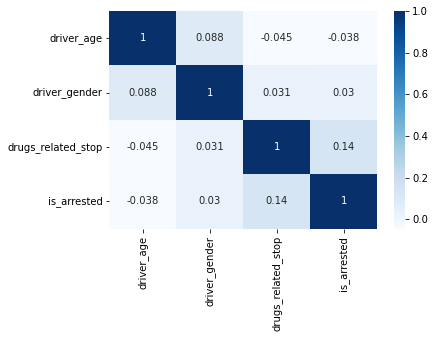

In [52]:
##heatmap to show correlation between selected independent and dependent variables. 
import seaborn as sb 
corr_map = selected_variables.corr() 
sb.heatmap(corr_map, cmap="Blues", annot=True)

the heatmap above shows the correlation bettwen the selected variables. the correlation coefficient of the values in the heatmap is "r".

###### The statistical method I'll be using to find the correlation (both r; strenght and p; significance values) of the chosen variables is the Pearson statistical method

#### Age and arrested:<div style= "color: brown">The r value of the correlation between driver_age and is_arrested is negative, so that means the correlation is negative and there is no positive relationship between driver_age and is_arrested.                                As seen, r=-0.038. Now to check its significance (that is the p value), i will be using pearson statistical method. 

In [53]:
#correlation between drver_age and is_arrested

In [54]:
# to find the p value(the significance of the correlation)
from scipy import stats
r,p= stats.pearsonr(df.driver_age,df.is_arrested)
print(round(r,3))
print(round(p,18))

-0.038
8.8e-17


the p (significance) value is very small, that means there's a low chance that the correlation there is correlation between the two values.  

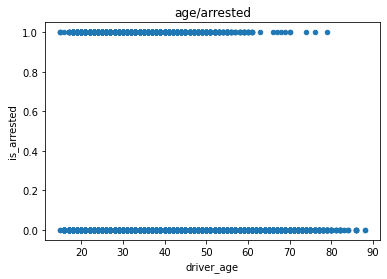

In [55]:
##using scatterplot
df.plot.scatter(x='driver_age', y='is_arrested', title="age/arrested");
## the scatter plot shows that there is no correlation between driver_age and is_arrested

#### Gender and arrested: <div style= "color: brown">The r value of the correlation between driver_gender and is_arrested is 0.03, which is positive but is close to zero, so that implies that there is no correlation between driver_gender and is_arrested.

In [56]:
#correlation p between driver_gender and is_arrested
r,p= stats.pearsonr(df.driver_gender,df.is_arrested)
print(round(r,4))
print(round(p,18))

0.0302
2.2048205e-11


the p value is also small here, so that means that there is a low chance that there is a correlation between driver_gender and is_arrested

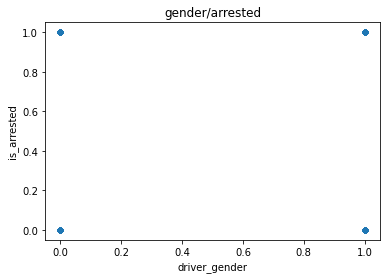

In [57]:
##using scatterplot
df.plot.scatter(x='driver_gender', y='is_arrested', title="gender/arrested");
##the scatter plot shows that there is no correlation between driver_gender and is_arrested

#### Age and drugs: <div style= "color: brown">the correlation between driver_age and drugs_related_stop is similar to that of driver_age and is_arrested. the value is negative and is close to zero so there is no correlation. the same thing goes for the p value which also signifies that there's a low likelihood that there is correlation between the two values. As seen in the scatter plot below, there is no form of correlation.

In [58]:
#correlation between driver_age and drugs_related_stop
r,p= stats.pearsonr(df.driver_age,df.drugs_related_stop)
print(round(r,4))
print(round(p,23))

-0.0454
1.0000000000000001e-23


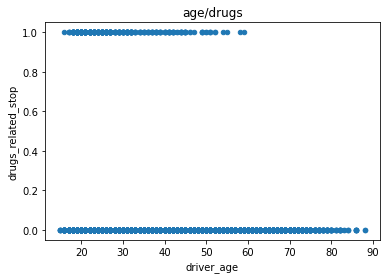

In [59]:
##using scatterplot
df.plot.scatter(x='driver_age', y='drugs_related_stop', title="age/drugs");
## similar to the scatter plot of driver_age and is_arrested, 
##the scatter plot shows that there is no correlation between driver_age and drugs_related_stop

#### Gender and drugs: <div style= "color: brown">the correlation between driver_gender and drugs_related_stop is similar to that of driver_gender and is_arrested. the value is 0.031 and is close to zero so there is no correlation. the same thing goes for the p value which also signifies that there's a low likelihood that there is correlation between the two values. As seen in the scatter plot below, there is no form of correlation.

In [60]:
#correlation between driver_gender and drugs_related_stop
r,p= stats.pearsonr(df.driver_gender,df.drugs_related_stop)
print(round(r,4))
print(round(p,13))

0.031
6.7e-12


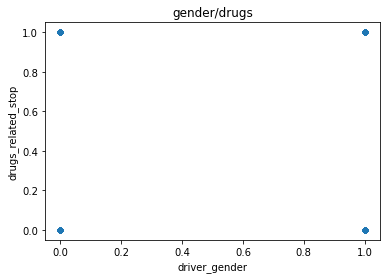

In [61]:
##using scatterplot
df.plot.scatter(x='driver_gender', y='drugs_related_stop', title="gender/drugs");
## similar to the scatter plot of driver_gender and is_arrested, 
##the scatter plot shows that there is no correlation between driver_gender and drugs_related_stop

Crosstabs for chosen variables:

In [62]:
#tabular summary of the data in form of crosstabs (reshaping the data)
##for driver_age and is_arrested
pd.crosstab(df['driver_age'], df['is_arrested'], margins=True)

is_arrested,0,1,All
driver_age,,,
15.0,2,3,5
16.0,25,1,26
17.0,371,7,378
18.0,1101,28,1129
19.0,1918,56,1974
...,...,...,...
83.0,2,0,2
84.0,3,0,3
86.0,6,0,6


In [63]:
##for driver_gender and is_arrested
pd.crosstab(df['driver_gender'], df['is_arrested'], margins=True)

is_arrested,0,1,All
driver_gender,,,
0,12550,355,12905
1,34639,1461,36100
All,47189,1816,49005


In [64]:
##for driver_age and stop_time
pd.crosstab(df['driver_age'], df['drugs_related_stop'], margins=True)

drugs_related_stop,0,1,All
driver_age,,,
15.0,5,0,5
16.0,25,1,26
17.0,374,4,378
18.0,1112,17,1129
19.0,1942,32,1974
...,...,...,...
83.0,2,0,2
84.0,3,0,3
86.0,6,0,6


In [65]:
##for driver_gender and stop_time
pd.crosstab(df['driver_gender'], df['drugs_related_stop'], margins=True)

drugs_related_stop,0,1,All
driver_gender,,,
0,12861,44,12905
1,35750,350,36100
All,48611,394,49005


#### VISUALIZATIONS

<AxesSubplot:title={'center':'driver_age and is_arrested'}, xlabel='driver_age'>

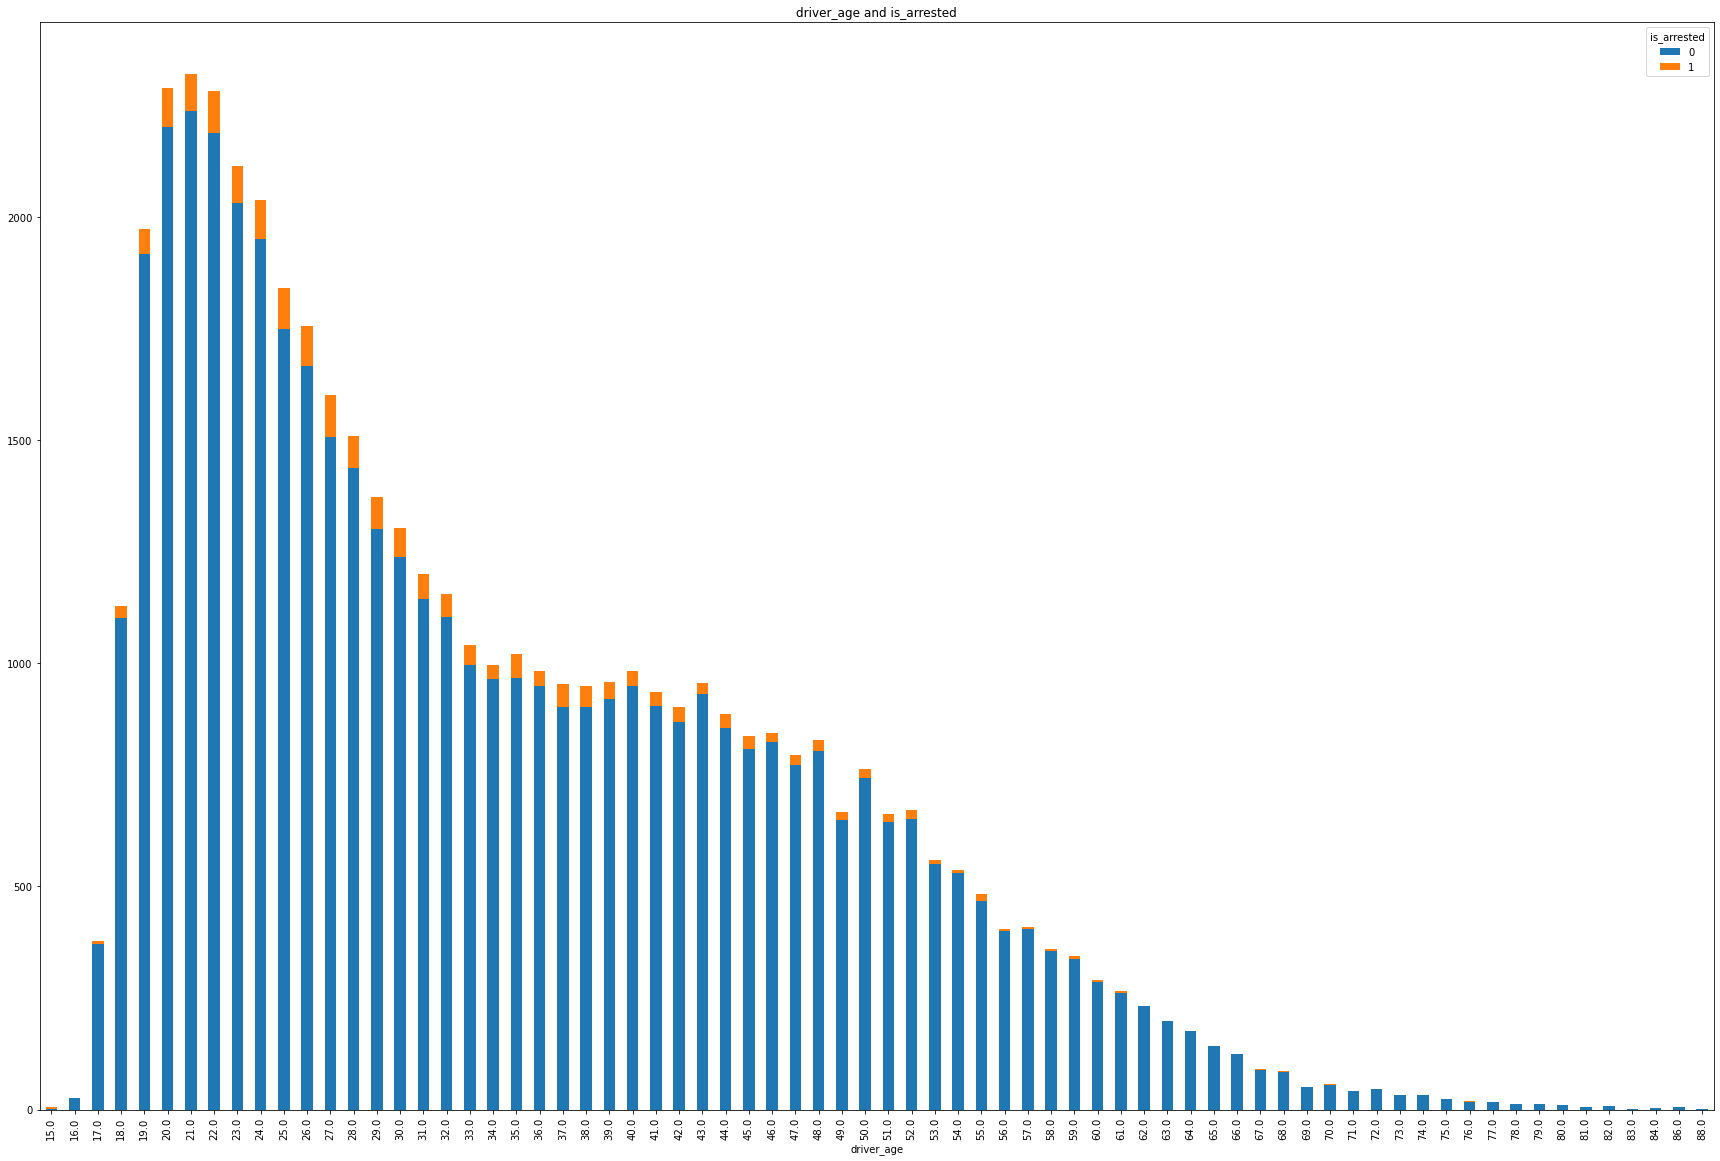

In [66]:
##driver_age and is_arrested
pd.crosstab(df['driver_age'], df['is_arrested']).plot.bar(stacked=True, title="driver_age and is_arrested",figsize=(30,20)) 

From the bar graph above, I can interpret that the number of arrested violators is highest between ages 19-40. Ages 15-18, 41-61 have low numbers of arrested violators. Ages 71-74, 77-88 have no arrested violators. 

<AxesSubplot:title={'center':'driver_gender and is_arrested'}, xlabel='driver_gender'>

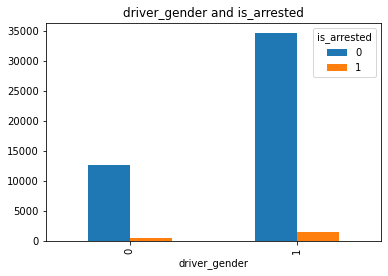

In [67]:
pd.crosstab(df['driver_gender'], df['is_arrested']).plot.bar(title="driver_gender and is_arrested") 

The number of violators arrested is higher within the male violators than female violators as only a little number of female violators were arrested. Another point is that the number of violators that are not arrested are also high in male violators. This just simply means that the male violators have the highest number of violations.

<AxesSubplot:title={'center':'driver_age and drugs_related_stop '}, xlabel='driver_age'>

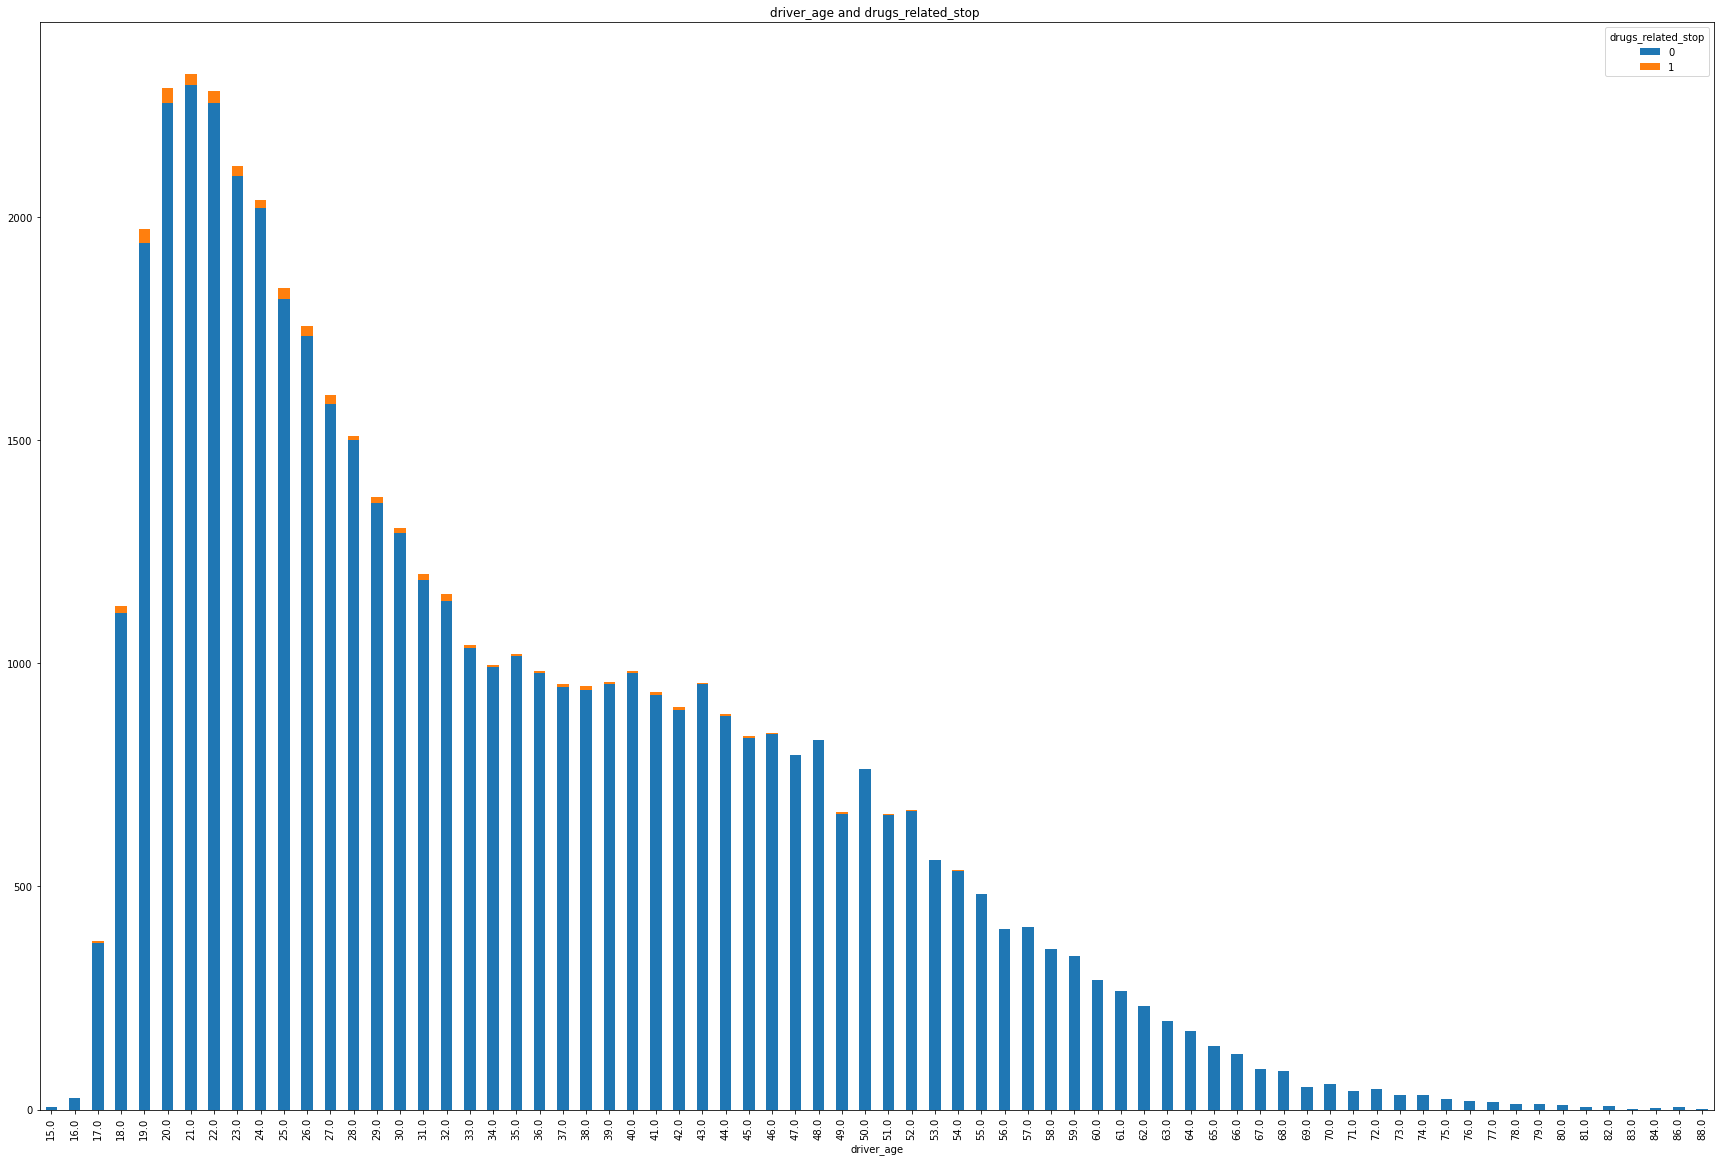

In [68]:
##driver_age and drugs_related_stop
pd.crosstab(df['driver_age'], df['drugs_related_stop']).plot.bar(stacked=True, title="driver_age and drugs_related_stop ",
                                                                 figsize=(30,20)) 

the violators most associated with drugs are within the ages 18-32. Ages 17, 33-42 have the lowest number of drug related cases. Ages 53, 55-88 don’t have any drug related cases. 

<AxesSubplot:title={'center':'driver_gender and drugs_related_stop '}, xlabel='driver_gender'>

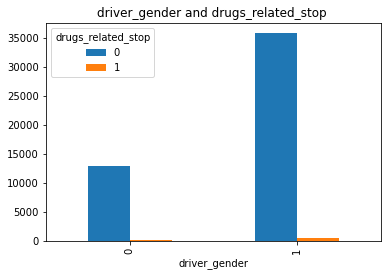

In [69]:
##driver_gender and drugs_related_stop
pd.crosstab(df['driver_gender'], df['drugs_related_stop']).plot.bar(title="driver_gender and drugs_related_stop ") 

as seen from the bar plot above, the number of violators associated with drugs is high in males compared to females as there is very little number of female violators associated with drugs.  